# **Open CV Intro**

**Instal Package** 

*   OpenCV     : pip install opencv-python



**Support**

*   Programming Language : C++, Python, Java, MATLAB, etc.
*   Operating Systems : Windows, Linux, Android and Mac OS 
*   Hardware Acceleration : CUDA (NVIDIA) & OpenCL








**Citra Digital**


*   Citra digital (umumnya) terdiri dari 3 layer (channel) warna R, G & B.
*   Tiap layer memiliki tinggi dan lebar citra yang sama.
*   Tiap titik pada layer memiliki nilai 8bit (0 - 255) yag di sebut pixel.








**Import Library**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [ ]:
cv2.__version__

'4.1.2'

# ***Traditional Image Processing by cv2***
1. Cropping
2. Rotation
3. Translation
4. Resizing
5. Flipping
6. Padding
7. Split color channel

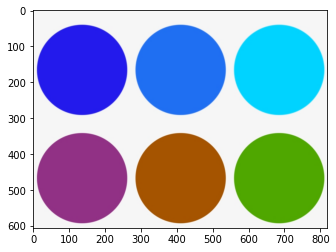

In [ ]:
circles = cv2.imread("circles.png")
plt.imshow(circles)
plt.show()

In [ ]:
type(circles)

numpy.ndarray

In [ ]:
circles.shape

(606, 820, 3)

In [ ]:
h, w, c = circles.shape
h, w, c

(606, 820, 3)

In [ ]:
os.path.getsize("circles.png")/1024

68.52734375

**Akses Gambar Per Channel**

In [ ]:
circles[:, :, 0].shape # layer 0 (Blue)

(606, 820)

In [ ]:
circles[:, :, 1].shape # layer 1 (Green)

(606, 820)

In [ ]:
circles[:, :, 2].shape # layer 2 (Red)

(606, 820)

**Akses Individual Pixel**

In [ ]:
circles[0, 0]

array([248, 248, 248], dtype=uint8)

In [ ]:
(B, G, R) = circles[200, 400]
print("R=%d, G=%d, B=%d" % (R, G, B))

R=242, G=111, B=31


# 1.Image Cropping

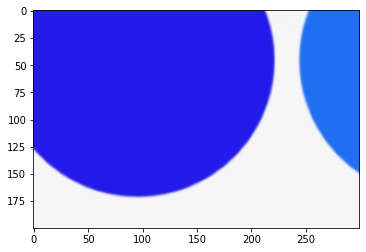

In [ ]:
patch = (300, 200)
center = (190, 220)
cropped_image = cv2.getRectSubPix(circles, patch, center)
plt.imshow(cropped_image)
plt.show()

In [ ]:
def crop(img, center, width, height):
    return cv2.getRectSubPix(img, (width, height), center)

In [ ]:
cropped = crop(circles, center=(190, 220), width=300, height=200)
plt.imshow(cropped)
plt.show()

# **2. Rotation-cv2.warpAffine**
- get the transform matrix with `cv2.getRotationMatrix2D`
- params to `cv2.getRotationMatrix2D`: center, angle(+ -> counterclockwise), scale

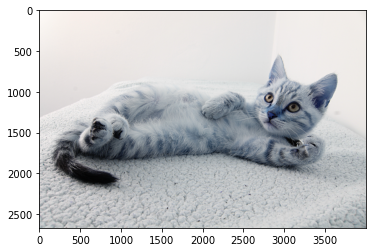

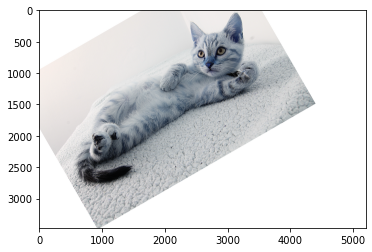

In [ ]:
cat = cv2.imread("cat.jpg")
center = cat.shape[1]/2, cat.shape[0]/2
angle = 30
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)

rotated_cat = cv2.warpAffine(cat, M, (int(cat.shape[1]*1.3), int(cat.shape[0]*1.3)), borderValue=(255, 255, 255))
plt.imshow(cat)
plt.figure()
plt.imshow(rotated_cat)

### rotation function

# **3. Translation - cv.warpAffine**
- params: img, transMatrix, dsize (dest image size)
- transMatrix M should always be np.asarray([[1., 0., tx], [0., 1., ty]]), where tx and ty are offset on x and y (-x -> left, -y -> up). And it must be a float matrix
- dsize should most of time be (src_img.shape[1], src_img.shape[0]), which are WIDTH and HEIGHT of images (in image domain instead of ndarray domain)

In [ ]:
cat = cv2.imread("cat.jpg")
shifted_cat = cv2.warpAffine(cat, 
               np.array([[1, 0, 30], 
                        [0, 1, 100]], 
                dtype = np.float),
               dsize = (cat.shape[1], cat.shape[0])) # right down shift

plt.imshow(cat)
plt.figure()
plt.imshow(shifted_cat)

# **4. Resizing - cv2.resize**
- it is aspect-ratio (width/height) constant resize 
- params to cv2.resize: img, (with, height) of dest, interpolation_method, cv2.INTER_XX, e.g., cv2.INTER_AREA
- you can also do it via rotation and warpAffine, but the effects are very different - in terms of the dimension of the resulted arrays

In [ ]:
cat = cv2.imread("cat.jpg")
width, height = int(cat.shape[1]*0.3), int(cat.shape[0]*0.3)
resized_cat = cv2.resize(cat, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)
plt.imshow(cat)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(resized_cat)
print(resized_cat.shape)

# **5. Flipping**

In [ ]:
cat = cv2.imread("cat.jpg")
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

fig.tight_layout()

axes = axes.ravel()
axes[0].imshow(cat)
axes[1].imshow(cat[:, ::-1, :])
axes[2].imshow(cat[::-1, :, :])
axes[3].imshow(cat[::-1, ::-1, :])

# 6. Padding

In [ ]:
img = cv2.imread('cat.jpg')
bordersize = 100
color = [255, 255, 255]
bordered_img=cv2.copyMakeBorder(img, 
                                top=bordersize,bottom=bordersize, 
                                left=bordersize, right=bordersize, 
                                borderType= cv2.BORDER_CONSTANT, 
                                value=color )
#cv2.circle(bordered_img, (300, 320), radius = 10, color = [255, 0 ,0])
plt.imshow(bordered_img)
plt.show()

# ***7. Split Color Channels***
- using cv2.split and cv2.merge needs to stick with (BGR) channel encoding, which might be more troublesome

In [ ]:
wave = cv2.imread("circles.png")
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
axes = axes.ravel()

fig.tight_layout()
axes[0].imshow(wave)
axes[0].set_title("original")
axes[1].imshow(wave[:, :, 0], cmap = plt.cm.gray)
axes[1].set_title("red")
axes[2].imshow(wave[:, :, 1], cmap = plt.cm.gray)
axes[2].set_title("green")
axes[3].imshow(wave[:, :, 2], cmap = plt.cm.gray)
axes[3].set_title("blue")